___
# Atividade: Bootstrapping
___

## Aula 20

**Preparo Prévio:**
1. Magalhães e Lima, seção 7.4. Concentrar-se em intervalo de confiança para média amostra
1. Bootstrapping - https://www.thoughtco.com/example-of-bootstrapping-3126155
1. Bootstrapping - https://www.stat.auckland.ac.nz/~wild/BootAnim/

**Hoje:**
1. Entender e implementar o método não paramétrico de Bootstrapping 

**Próxima aula:**
1. Montogmery. Seção 6-2 - Simple Linear Regression
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples

___

Uma gerente de uma fábrica decidiu recalibrar uma das máquinas da linha de produção para reduzir o seu tempo de execução. A amostra abaixo representa o tempo medido entre a entrada do bloco cru e a saída manufaturada em minutos.

Tamanho da Amostra: 13
Média: 0.5453557469230769
Desvio Padrão: 0.2547555304406469


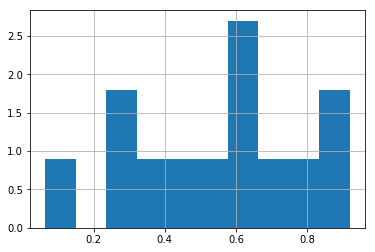

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np

x = [0.69689142,  0.57995802,  0.06450754,  0.61206626,  0.91976314,  0.34363861,  0.82575631,  0.41666036,  
     0.62153527,  0.56757104,  0.86683518,  0.28922458,  0.28521698]

n = len(x)

print("Tamanho da Amostra: {0}".format(n))
print("Média: {0}".format(np.mean(x)))
print("Desvio Padrão: {0}".format(np.std(x, ddof=1)))
pd.Series(x).hist(normed=True);

Excepcionalmente hoje, os funcionários estavam reclamando de uma lentidão maior, pois o tempo de execução demorava em média 0.68 minutos com um desvio padrão amostral de 0.27 minutos. Usando um nível de significância de 95%, podemos afirmar que há algum problema estrutural?

___
Como visto em aulas passadas, para poder realizar esse Teste de Hipóteses, temos as seguintes premissas:

$$\bar{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^nX_i}{n}$$

Onde $X_i$ é uma variável aleatória de uma distribuição **desconhecida**. Se $X_i$ fosse uma normal com **apenas** a variância desconhecida, ou seja, com média $\mu_X$ conhecida, deveríamos utilizar o teste T. Ou ainda, se n fosse suficientemente grande, poderíamos assumir que $\bar{X}$ é normal devido ao TLC. <br />
Porém sem as premissas anteriores, não é possível realizar alguma inferência sobre $\bar{X}$ com a metodologia aprendida até o momento.

**Resumindo**: Não sabemos qual é a distribuição de $X_i$ e nem a ditribuição de $\bar{X}$!!!
___

## Solução: Métodos não paramétricos

Bootstrapping é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Por exemplo, podemos utilizar a média como medida de interesse, mas a distribuição de outras medidas também pode ser estimadas, como por exemplo variância, mediana, kurtosis, etc.

Reamostragem com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido. Seria equivalente a sortear um número e por de volta na urna.

### Como funciona

Dada um conjunto com a amostra mestre aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecultivamente, com reposição, conjuntos de tamanho também n dessa amostra amostra mestre. Esses conjuntos são chamados de reamostragem e esse processo deve ser feito milhares de vezes.

A cada reamostragem deve-se aplicar a medida de interesse, nesse caso a média, e guardar em uma lista. Ao fim das milhares de reamostragens, teremos uma distribuição da medida desejada. 

De posse desta distribuição, podemos calcular o Intervalo de Confiança através dos seus percentis.

___
**Questão 1** - Reconstruir o $\bar{X}$ usando o bootstrapping.

Algoritmo:
    1. Repetir 10000 vezes:
        1.1. Realizar um sorteio com reposição da amostra mestre. Usar a função choice() do numpy.
        1.2. Calcular a média da reamostragem e guardar em uma lista.
    2. Plotar o histograma da lista.
    3. Exibir a média e o desvio padrão dos elementos da lista.

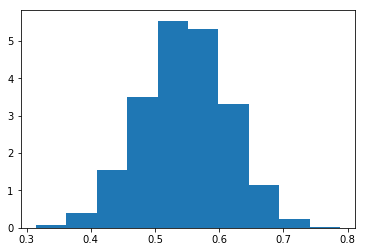

In [41]:
import numpy
from numpy import random
import matplotlib.pyplot as plt


reamostragem=[]

media=[]

for i in range (0,10000):
    soma=sum(numpy.random.choice(x,size=13,replace=True))
    a=soma/13
    media.append(a)

    
plt.hist(media,normed=True);


___
**Questão 2** - Montar as Hipóteses e o intervalo de confiança para um nível de significância de 95% bicaudal. Responder o problema de inferência.

In [42]:
#Ho = 0.54
#Hi != 0.54

print(pd.Series(media).quantile(q=0.025))
print(numpy.percentile(media,2.5))



print(pd.Series(media).quantile(q=0.975))
print(numpy.percentile(media,97.5))

0.4123639097692308
0.412363909769
0.6760364261153845
0.676036426115


___
**Questão 3** - O fabricante da máquina disse que após a recalibração, a máquina deveria apresentar certo comportamento, onde $X_i$ deveria ser uma variável Beta de parâmetros a=2 e b=2. 

Realizar 10000 sorteios de amostras de tamanho n da distribuição. Plotar o histograma das médias de cada conjunto de n elementos.

0.4991185937890943


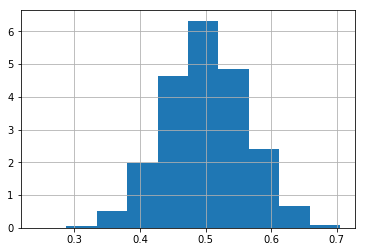

In [48]:
from scipy import stats
L2=[]
for i in range(10000):
    L2.append(stats.beta.rvs(a=2,b=2,size=n).mean())
    
    
pd.Series(L2).hist(normed=True);



___
**Questão 4** - Analisar os dois histogramas feitos anteriormente e comentar os resultados. Há viés (bias) na estimativa do Bootstrapping?

___
## Para ir além...

Como dito na aula, podemos utilizar outras medidas de interesse nesta técnica.

**Questão 5** - Repetir todos os passos da inferência, porém aplicando-a sobre a **variância**.